In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cleaned.csv')

In [19]:
df.columns

Index(['Lng', 'Lat', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage', 'tradeTime_year', 'tradeTime_month',
       'tradeTime_day', 'tradeTime_ordinal', 'tradeTime_month_sin',
       'tradeTime_month_cos', 'floorType', 'floorHeight'],
      dtype='object')

In [4]:
df.head()

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,district,communityAverage,tradeTime_year,tradeTime_month,tradeTime_day,tradeTime_ordinal,tradeTime_month_sin,tradeTime_month_cos,floorType,floorHeight
0,116.475489,40.019520,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,...,7.0,56021.0,2016.0,8.0,9.0,736185.0,-8.660254e-01,-5.000000e-01,3.0,26.0
1,116.453917,39.881534,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,...,7.0,71539.0,2016.0,7.0,28.0,736173.0,-5.000000e-01,-8.660254e-01,3.0,22.0
2,116.561978,39.877145,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,...,7.0,48160.0,2016.0,12.0,11.0,736309.0,-2.449294e-16,1.000000e+00,2.0,4.0
3,116.438010,40.076114,965.0,138.0,297.5,22202.0,134.00,3.0,1.0,1.0,...,6.0,51238.0,2016.0,9.0,30.0,736237.0,-1.000000e+00,-1.836970e-16,0.0,21.0
4,116.428392,39.886229,927.0,286.0,392.0,48396.0,81.00,2.0,1.0,1.0,...,1.0,62588.0,2016.0,8.0,28.0,736204.0,-8.660254e-01,-5.000000e-01,2.0,6.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  314087 non-null  float64
 1   Lat                  314087 non-null  float64
 2   DOM                  314087 non-null  float64
 3   followers            314087 non-null  float64
 4   totalPrice           314087 non-null  float64
 5   price                314087 non-null  float64
 6   square               314087 non-null  float64
 7   livingRoom           314087 non-null  float64
 8   drawingRoom          314087 non-null  float64
 9   kitchen              314087 non-null  float64
 10  bathRoom             314087 non-null  float64
 11  buildingType         314087 non-null  float64
 12  constructionTime     314087 non-null  float64
 13  renovationCondition  314087 non-null  float64
 14  buildingStructure    314087 non-null  float64
 15  ladderRatio      

In [74]:
df.apply(pd.Series.nunique)

Lng                     3701
Lat                     3699
DOM                      547
followers                543
totalPrice              5737
price                  79557
square                 17711
livingRoom                 9
drawingRoom                6
kitchen                    4
bathRoom                   8
buildingType               4
constructionTime          66
renovationCondition        4
buildingStructure          6
ladderRatio              182
elevator                   2
fiveYearsProperty          2
subway                     2
district                  13
communityAverage        3944
tradeTime_year            13
tradeTime_month           12
tradeTime_day             31
tradeTime_ordinal       2554
tradeTime_month_sin       11
tradeTime_month_cos       11
floorType                  6
floorHeight               39
dtype: int64

In [75]:
building_types = pd.get_dummies(df['buildingType'], prefix='buildingType', dtype=int)

In [76]:
df.drop(['buildingType'], axis=1, inplace=True)

In [77]:
df = df.join(building_types)

In [78]:
renovation_conditions = pd.get_dummies(df['renovationCondition'], prefix='renovationCondition', dtype=int)

In [79]:
df.drop(['renovationCondition'], axis=1, inplace=True)
df = df.join(renovation_conditions)

In [80]:
building_structures = pd.get_dummies(df['buildingStructure'], prefix='buildingStructure', dtype=int)

In [81]:
df.drop(['buildingStructure'], axis=1, inplace=True)
df = df.join(building_structures)

In [82]:
elevator = pd.get_dummies(df['elevator'], prefix='elevator', dtype=int)


In [83]:
df.drop(['elevator'], axis=1, inplace=True)
df = df.join(elevator)

In [84]:
fiveYearsProperty = pd.get_dummies(df['fiveYearsProperty'], prefix='fiveYearsProperty', dtype=int)

In [85]:
df.drop(['fiveYearsProperty'], axis=1, inplace=True)
df = df.join(fiveYearsProperty)

In [86]:
subway = pd.get_dummies(df['subway'], prefix='subway', dtype=int)

In [87]:
df.drop(['subway'], axis=1, inplace=True)
df = df.join(subway)

In [89]:
district = pd.get_dummies(df['district'], prefix='district', dtype=int)

In [90]:
df.drop(['district'], axis=1, inplace=True)
df = df.join(district)

In [94]:
floorType = pd.get_dummies(df['floorType'], prefix='floorType', dtype=int)

In [95]:
df.drop(['floorType'], axis=1, inplace=True)
df = df.join(floorType)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 60 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lng                      314087 non-null  float64
 1   Lat                      314087 non-null  float64
 2   DOM                      314087 non-null  float64
 3   followers                314087 non-null  float64
 4   totalPrice               314087 non-null  float64
 5   price                    314087 non-null  float64
 6   square                   314087 non-null  float64
 7   livingRoom               314087 non-null  float64
 8   drawingRoom              314087 non-null  float64
 9   kitchen                  314087 non-null  float64
 10  bathRoom                 314087 non-null  float64
 11  constructionTime         314087 non-null  float64
 12  ladderRatio              314087 non-null  float64
 13  communityAverage         314087 non-null  float64
 14  trad

In [99]:
df.to_csv('cleaned_en.csv', index=False)

In [101]:
df.columns

Index(['Lng', 'Lat', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'communityAverage', 'tradeTime_year', 'tradeTime_month',
       'tradeTime_day', 'tradeTime_ordinal', 'tradeTime_month_sin',
       'tradeTime_month_cos', 'floorHeight', 'buildingType_1.0',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'renovationCondition_1.0', 'renovationCondition_2.0',
       'renovationCondition_3.0', 'renovationCondition_4.0',
       'buildingStructure_1.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'buildingStructure_6.0', 'elevator_0.0',
       'elevator_1.0', 'fiveYearsProperty_0.0', 'fiveYearsProperty_1.0',
       'subway_0.0', 'subway_1.0', 'district_1.0', 'district_2.0',
       'district_3.0', 'district_4.0', 'district_5.0', 'district_6.0',
       'district_7.0', 'district_8.0', 'district

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant


In [102]:
X=df[['DOM', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'communityAverage', 'tradeTime_year', 'tradeTime_month',
       'tradeTime_day', 'tradeTime_ordinal', 'tradeTime_month_sin',
       'tradeTime_month_cos', 'floorHeight', 'buildingType_1.0',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'renovationCondition_1.0', 'renovationCondition_2.0',
       'renovationCondition_3.0', 'renovationCondition_4.0',
       'buildingStructure_1.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'buildingStructure_6.0', 'elevator_0.0',
       'elevator_1.0', 'fiveYearsProperty_0.0', 'fiveYearsProperty_1.0',
       'subway_0.0', 'subway_1.0', 'district_1.0', 'district_2.0',
       'district_3.0', 'district_4.0', 'district_5.0', 'district_6.0',
       'district_7.0', 'district_8.0', 'district_9.0', 'district_10.0',
       'district_11.0', 'district_12.0', 'district_13.0', 'floorType_0.0',
       'floorType_1.0', 'floorType_2.0', 'floorType_3.0', 'floorType_4.0',
       'floorType_5.0']]
X = add_constant(X)
y=df['price']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[1.4857611034279106, 1.4833726416412423, 4.826872658922637, 6.423123966586774, 2.611796448879102, 1.708604451332082, 1.1344378715379506, 2.2128909696951986, 2.105516904129986, 1.0001587069378735, 4.856007531703833, 1601101.5716848897, 48681.83404830802, 336.1153914124098, 1565718.5069361443, 3.2431371064143515, 2.0818910009169924, 1.1472613295288656, inf, inf, inf, inf, inf, inf, inf, inf, 9007199254740992.0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


In [106]:
X = X.drop(columns=[
    'buildingType_4.0',               # Keep 3/4 categories
    'renovationCondition_4.0',        # Keep 3/4
    'buildingStructure_6.0',          # Keep 5/6
    'elevator_0.0',                   # Keep either 0.0 or 1.0
    'fiveYearsProperty_0.0',          # Keep either 0.0 or 1.0
    'subway_0.0',                     # Keep either 0.0 or 1.0
    'floorType_5.0',                   # Keep 5/6 categories

KeyError: "['buildingType_4.0', 'renovationCondition_4.0', 'buildingStructure_6.0', 'elevator_0.0', 'fiveYearsProperty_0.0', 'subway_0.0', 'floorType_5.0'] not found in axis"

In [104]:
# Choose ONE time representation:
X = X.drop(columns=[
    'tradeTime_year', 
    'tradeTime_month', 
    'tradeTime_day',
    'tradeTime_ordinal'  # Keep either this OR year/month/day
])

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# After fixes, recalculate:
vif = [variance_inflation_factor(X.values, i) 
       for i in range(X.shape[1])]

pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
39,district_11.0,inf
41,district_13.0,inf
31,district_3.0,inf
32,district_4.0,inf
33,district_5.0,inf
34,district_6.0,inf
35,district_7.0,inf
36,district_8.0,inf
37,district_9.0,inf
38,district_10.0,inf


In [107]:
X = X.drop(columns=[
    'floorType_2.0',
    'district_1.0'
])

In [108]:
# After fixes, recalculate:
vif = [variance_inflation_factor(X.values, i) 
       for i in range(X.shape[1])]

pd.DataFrame({
    'Feature': X.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

,Feature,VIF
0,const,117144.686451
34,district_7.0,6.054499
4,square,5.816567
33,district_6.0,4.624333
26,elevator_1.0,4.600656
11,communityAverage,4.388611
22,buildingStructure_2.0,3.732398
3,totalPrice,3.301316
29,district_2.0,3.203193
35,district_8.0,3.005098


In [109]:
X.head()

,const,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,...,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0
0,1.0,1464.0,106.0,415.0,131.00,2.0,1.0,1.0,1.0,2005.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,903.0,126.0,575.0,132.38,2.0,2.0,1.0,2.0,2004.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1271.0,48.0,1030.0,198.00,3.0,2.0,1.0,3.0,2005.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,965.0,138.0,297.5,134.00,3.0,1.0,1.0,1.0,2008.0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,927.0,286.0,392.0,81.00,2.0,1.0,1.0,1.0,1960.0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   const                    314087 non-null  float64
 1   DOM                      314087 non-null  float64
 2   followers                314087 non-null  float64
 3   totalPrice               314087 non-null  float64
 4   square                   314087 non-null  float64
 5   livingRoom               314087 non-null  float64
 6   drawingRoom              314087 non-null  float64
 7   kitchen                  314087 non-null  float64
 8   bathRoom                 314087 non-null  float64
 9   constructionTime         314087 non-null  float64
 10  ladderRatio              314087 non-null  float64
 11  communityAverage         314087 non-null  float64
 12  tradeTime_month_sin      314087 non-null  float64
 13  tradeTime_month_cos      314087 non-null  float64
 14  floo

In [111]:
df_en_mc = X.join(y)

In [112]:
df_en_mc.head()

,const,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,...,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0,price
0,1.0,1464.0,106.0,415.0,131.00,2.0,1.0,1.0,1.0,2005.0,...,0,0,0,0,0,0,0,1,0,31680.0
1,1.0,903.0,126.0,575.0,132.38,2.0,2.0,1.0,2.0,2004.0,...,0,0,0,0,0,0,0,1,0,43436.0
2,1.0,1271.0,48.0,1030.0,198.00,3.0,2.0,1.0,3.0,2005.0,...,0,0,0,0,0,0,0,0,0,52021.0
3,1.0,965.0,138.0,297.5,134.00,3.0,1.0,1.0,1.0,2008.0,...,0,0,0,0,0,1,0,0,0,22202.0
4,1.0,927.0,286.0,392.0,81.00,2.0,1.0,1.0,1.0,1960.0,...,0,0,0,0,0,0,0,0,0,48396.0


In [113]:
df_en_mc.drop(['const'], axis=1, inplace=True)

In [114]:
df_en_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  buil

In [118]:
df_en_mc.columns

Index(['DOM', 'followers', 'totalPrice', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'communityAverage', 'tradeTime_month_sin', 'tradeTime_month_cos',
       'floorHeight', 'buildingType_1.0', 'buildingType_2.0',
       'buildingType_3.0', 'renovationCondition_1.0',
       'renovationCondition_2.0', 'renovationCondition_3.0',
       'buildingStructure_1.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'elevator_1.0', 'fiveYearsProperty_1.0',
       'subway_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_8.0',
       'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0',
       'district_13.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0',
       'floorType_4.0', 'price'],
      dtype='object')

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()
df_en_mc_scaled = scaler.fit_transform(df_en_mc[['DOM', 'followers', 'totalPrice', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'communityAverage', 'tradeTime_month_sin', 'tradeTime_month_cos',
       'floorHeight', 'price']].to_numpy())

df_en_mc_scaled = pd.DataFrame(df_en_mc_scaled, columns=['DOM', 'followers', 'totalPrice', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'communityAverage', 'tradeTime_month_sin', 'tradeTime_month_cos',
       'floorHeight', 'price'])

In [121]:
df_en_mc_scaled.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,communityAverage,tradeTime_month_sin,tradeTime_month_cos,floorHeight,price
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,0.262240,0.066987,0.250000,0.446429,0.202747
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,0.352324,0.250000,0.066987,0.375000,0.277986
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,0.216606,0.500000,1.000000,0.053571,0.332930
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,0.234474,0.000000,0.500000,0.357143,0.142087
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,0.300362,0.066987,0.250000,0.089286,0.309730


In [123]:
df_en_mc_scaled = df_en_mc_scaled.join(df_en_mc[['buildingType_1.0', 'buildingType_2.0',
       'buildingType_3.0', 'renovationCondition_1.0',
       'renovationCondition_2.0', 'renovationCondition_3.0',
       'buildingStructure_1.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'elevator_1.0', 'fiveYearsProperty_1.0',
       'subway_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_8.0',
       'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0',
       'district_13.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0',
       'floorType_4.0']])

In [124]:
df_en_mc_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [125]:
df_en_mc_scaled.describe()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,...,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0
count,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,3.140870e+05,...,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000,314087.000000
mean,0.009876,0.014656,0.070998,0.119292,0.250618,0.233933,0.331544,0.169118,0.746840,6.404259e-06,...,0.121428,0.036111,0.096454,0.043774,0.005352,0.028826,0.079090,0.202055,0.220732,0.117566
std,0.022311,0.029910,0.045762,0.056734,0.095916,0.103608,0.034461,0.060635,0.128906,2.523419e-03,...,0.326625,0.186567,0.295214,0.204593,0.072962,0.167319,0.269879,0.401534,0.414741,0.322094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002983,0.000000,0.041817,0.079889,0.125000,0.200000,0.333333,0.142857,0.666667,2.357784e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.002983,0.004374,0.059981,0.105559,0.250000,0.200000,0.333333,0.142857,0.772727,3.187004e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003580,0.015748,0.086716,0.144065,0.250000,0.200000,0.333333,0.142857,0.833333,4.855436e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
df_en_mc_scaled.to_csv('cleaned_en_mc_scaled.csv', index=False)

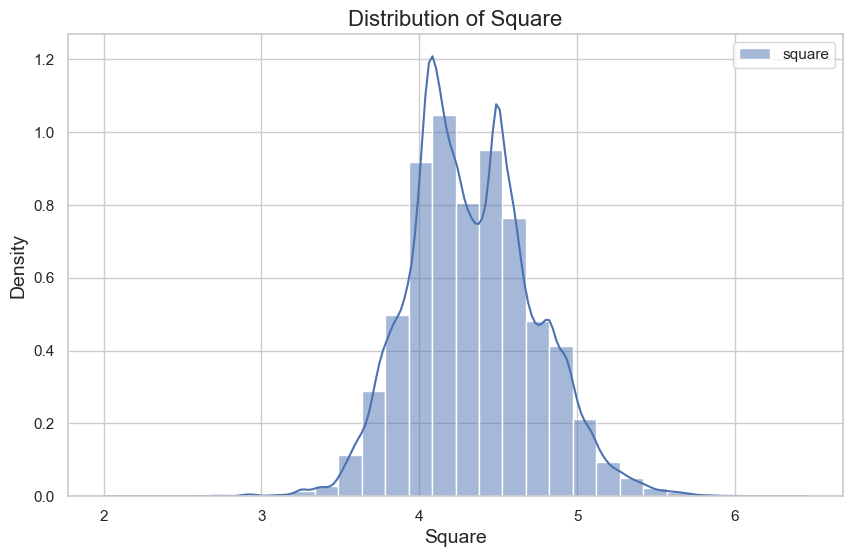

In [135]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the distribution of 'DOM'
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df[['square']]), bins=30, kde=True, color='blue', stat='density')

# Adding titles and labels
plt.title('Distribution of Square', fontsize=16)
plt.xlabel('Square', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [131]:
df.skew()

Lng                          0.313124
Lat                          0.243298
DOM                          6.096125
followers                    6.215989
totalPrice                   2.874846
price                        1.293904
square                       1.751375
livingRoom                   0.512652
drawingRoom                  0.318844
kitchen                     -4.373716
bathRoom                     2.164506
constructionTime            -0.949258
ladderRatio                396.285251
communityAverage             1.034300
tradeTime_year              -0.507967
tradeTime_month             -0.029026
tradeTime_day               -0.062972
tradeTime_ordinal           -0.497572
tradeTime_month_sin          0.056469
tradeTime_month_cos         -0.018575
floorHeight                  0.578258
buildingType_1.0             1.052252
buildingType_2.0            74.211529
buildingType_3.0             1.590152
buildingType_4.0            -0.175857
renovationCondition_1.0      0.519441
renovationCo

In [134]:
scaler.fit_transform(np.log(df[['square']]))

array([[0.6446566 ],
       [0.64700408],
       [0.73718909],
       ...,
       [0.43896875],
       [0.4904752 ],
       [0.40825928]])

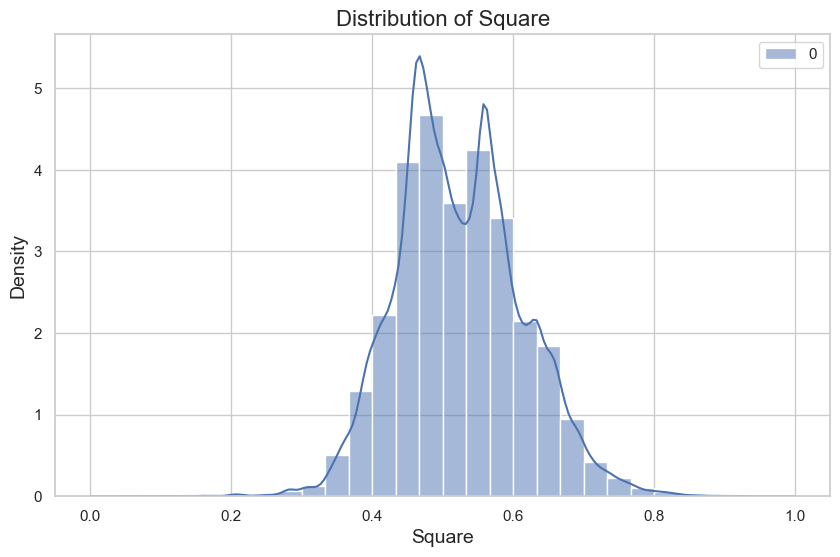

In [136]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the distribution of 'DOM'
plt.figure(figsize=(10, 6))
sns.histplot(scaler.fit_transform(np.log(df[['square']])), bins=30, kde=True, color='blue', stat='density')

# Adding titles and labels
plt.title('Distribution of Square', fontsize=16)
plt.xlabel('Square', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [ ]:
DOM                          6.096125
followers                    6.215989
totalPrice                   2.874846
price                        1.293904
square                       1.751375
ladderRatio                396.285251
communityAverage             1.034300

In [137]:
np.log(df['DOM']).skew()

0.5013264510286496

In [138]:
df['DOM_log'] = np.log(df['DOM'])
df['followers_log'] = np.log(df['followers'])
df['totalPrice_log'] = np.log(df['totalPrice'])
df['price_log'] = np.log(df['price'])
df['square_log'] = np.log(df['square'])
df['ladderRatio_log'] = np.log(df['ladderRatio'])
df['communityAverage_log'] = np.log(df['communityAverage'])


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [168]:
df[['DOM_log', 'followers_log', 'totalPrice_log', 'price_log', 'square_log', 'ladderRatio_log', 'communityAverage_log']].isin([np.inf, -np.inf]).sum()

DOM_log                     0
followers_log           82450
totalPrice_log              0
price_log                   0
square_log                  0
ladderRatio_log             0
communityAverage_log        0
dtype: int64

In [169]:
X_log = df.drop(['price', 'followers_log'], axis=1)

In [ ]:
vif = [variance_inflation_factor(X_log.values, i) 
       for i in range(X_log.shape[1])]

pd.DataFrame({
    'Feature': X_log.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
32,buildingStructure_5.0,inf
34,elevator_0.0,inf
25,renovationCondition_2.0,inf
26,renovationCondition_3.0,inf
27,renovationCondition_4.0,inf
...,...,...
63,ladderRatio_log,1.609896
3,followers,1.499798
19,floorHeight,1.147470
8,kitchen,1.142354


In [184]:
pd.DataFrame({
    'Feature': X_log.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False).head(50)

,Feature,VIF
32,buildingStructure_5.0,inf
34,elevator_0.0,inf
25,renovationCondition_2.0,inf
26,renovationCondition_3.0,inf
27,renovationCondition_4.0,inf
28,buildingStructure_1.0,inf
29,buildingStructure_2.0,inf
30,buildingStructure_3.0,inf
31,buildingStructure_4.0,inf
47,district_8.0,inf


In [185]:
df.head()

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,communityAverage,tradeTime_year,tradeTime_month,tradeTime_day,tradeTime_ordinal,tradeTime_month_sin,tradeTime_month_cos,floorHeight,buildingType_1.0,buildingType_2.0,buildingType_3.0,buildingType_4.0,renovationCondition_1.0,renovationCondition_2.0,renovationCondition_3.0,renovationCondition_4.0,buildingStructure_1.0,buildingStructure_2.0,buildingStructure_3.0,buildingStructure_4.0,buildingStructure_5.0,buildingStructure_6.0,elevator_0.0,elevator_1.0,fiveYearsProperty_0.0,fiveYearsProperty_1.0,subway_0.0,subway_1.0,district_1.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_2.0,floorType_3.0,floorType_4.0,floorType_5.0,DOM_log,followers_log,totalPrice_log,price_log,square_log,ladderRatio_log,communityAverage_log
0,116.475489,40.019520,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,1.0,2005.0,0.217,56021.0,2016.0,8.0,9.0,736185.0,-8.660254e-01,-5.000000e-01,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7.288928,4.663439,6.028279,10.363441,4.875197,-1.527858,10.933482
1,116.453917,39.881534,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,2.0,2004.0,0.667,71539.0,2016.0,7.0,28.0,736173.0,-5.000000e-01,-8.660254e-01,22.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.805723,4.836282,6.354370,10.679044,4.885677,-0.404965,11.177998
2,116.561978,39.877145,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,3.0,2005.0,0.500,48160.0,2016.0,12.0,11.0,736309.0,-2.449294e-16,1.000000e+00,4.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,7.147559,3.871201,6.937314,10.859403,5.288267,-0.693147,10.782284
3,116.438010,40.076114,965.0,138.0,297.5,22202.0,134.00,3.0,1.0,1.0,1.0,2008.0,0.273,51238.0,2016.0,9.0,30.0,736237.0,-1.000000e+00,-1.836970e-16,21.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,6.872128,4.927254,5.695414,10.007938,4.897840,-1.298283,10.844237
4,116.428392,39.886229,927.0,286.0,392.0,48396.0,81.00,2.0,1.0,1.0,1.0,1960.0,0.333,62588.0,2016.0,8.0,28.0,736204.0,-8.660254e-01,-5.000000e-01,6.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6.831954,5.655992,5.971262,10.787172,4.394449,-1.099613,11.044329


In [186]:
from math import radians, cos, sin, asin, sqrt

def distance(lat2, lon2,lat1=39.916668,lon1=116.383331): 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
    r = 6371 # Radius of earth in kilometers
    return(c * r)

In [189]:
df_en_mc['distance'] = df.apply(lambda x: distance (x['Lat'],x['Lng']),axis=1)

In [191]:
df.head()

,Lng,Lat,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,communityAverage,tradeTime_year,tradeTime_month,tradeTime_day,tradeTime_ordinal,tradeTime_month_sin,tradeTime_month_cos,floorHeight,buildingType_1.0,buildingType_2.0,buildingType_3.0,buildingType_4.0,renovationCondition_1.0,renovationCondition_2.0,renovationCondition_3.0,renovationCondition_4.0,buildingStructure_1.0,buildingStructure_2.0,buildingStructure_3.0,buildingStructure_4.0,buildingStructure_5.0,buildingStructure_6.0,elevator_0.0,elevator_1.0,fiveYearsProperty_0.0,fiveYearsProperty_1.0,subway_0.0,subway_1.0,district_1.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_2.0,floorType_3.0,floorType_4.0,floorType_5.0,DOM_log,followers_log,totalPrice_log,price_log,square_log,ladderRatio_log,communityAverage_log,distance
0,116.475489,40.019520,1464.0,106.0,415.0,31680.0,131.00,2.0,1.0,1.0,1.0,2005.0,0.217,56021.0,2016.0,8.0,9.0,736185.0,-8.660254e-01,-5.000000e-01,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7.288928,4.663439,6.028279,10.363441,4.875197,-1.527858,10.933482,13.873607
1,116.453917,39.881534,903.0,126.0,575.0,43436.0,132.38,2.0,2.0,1.0,2.0,2004.0,0.667,71539.0,2016.0,7.0,28.0,736173.0,-5.000000e-01,-8.660254e-01,22.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.805723,4.836282,6.354370,10.679044,4.885677,-0.404965,11.177998,7.177732
2,116.561978,39.877145,1271.0,48.0,1030.0,52021.0,198.00,3.0,2.0,1.0,3.0,2005.0,0.500,48160.0,2016.0,12.0,11.0,736309.0,-2.449294e-16,1.000000e+00,4.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,7.147559,3.871201,6.937314,10.859403,5.288267,-0.693147,10.782284,15.861144
3,116.438010,40.076114,965.0,138.0,297.5,22202.0,134.00,3.0,1.0,1.0,1.0,2008.0,0.273,51238.0,2016.0,9.0,30.0,736237.0,-1.000000e+00,-1.836970e-16,21.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,6.872128,4.927254,5.695414,10.007938,4.897840,-1.298283,10.844237,18.331215
4,116.428392,39.886229,927.0,286.0,392.0,48396.0,81.00,2.0,1.0,1.0,1.0,1960.0,0.333,62588.0,2016.0,8.0,28.0,736204.0,-8.660254e-01,-5.000000e-01,6.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6.831954,5.655992,5.971262,10.787172,4.394449,-1.099613,11.044329,5.121626


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 68 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lng                      314087 non-null  float64
 1   Lat                      314087 non-null  float64
 2   DOM                      314087 non-null  float64
 3   followers                314087 non-null  float64
 4   totalPrice               314087 non-null  float64
 5   price                    314087 non-null  float64
 6   square                   314087 non-null  float64
 7   livingRoom               314087 non-null  float64
 8   drawingRoom              314087 non-null  float64
 9   kitchen                  314087 non-null  float64
 10  bathRoom                 314087 non-null  float64
 11  constructionTime         314087 non-null  float64
 12  ladderRatio              314087 non-null  float64
 13  communityAverage         314087 non-null  float64
 14  trad

In [197]:
df_dist_en_mc = df_en_mc

In [199]:
df_dist_en_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  buil

In [201]:
X_dist = df_dist_en_mc.drop(['price'], axis=1)

In [204]:
X_dist = add_constant(X_dist)

In [205]:
vif = [variance_inflation_factor(X_dist.values, i) 
       for i in range(X_dist.shape[1])]

pd.DataFrame({
    'Feature': X_dist.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

,Feature,VIF
0,const,121999.979425
34,district_7.0,6.296281
4,square,5.848928
33,district_6.0,5.543312
45,distance,5.410655
11,communityAverage,4.865864
26,elevator_1.0,4.606922
22,buildingStructure_2.0,3.732402
3,totalPrice,3.301659
29,district_2.0,3.210322


In [209]:
df_dist_en_mc_scaled = scaler.fit_transform(df_dist_en_mc[['DOM', 'followers', 'totalPrice', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'communityAverage', 'tradeTime_month_sin', 'tradeTime_month_cos',
       'floorHeight', 'price', 'distance']].to_numpy())

df_dist_en_mc_scaled = pd.DataFrame(df_dist_en_mc_scaled, columns=['DOM', 'followers', 'totalPrice', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio',
       'communityAverage', 'tradeTime_month_sin', 'tradeTime_month_cos',
       'floorHeight', 'price', 'distance'])

In [210]:
df_dist_en_mc_scaled = df_dist_en_mc_scaled.join(df_en_mc[['buildingType_1.0', 'buildingType_2.0',
       'buildingType_3.0', 'renovationCondition_1.0',
       'renovationCondition_2.0', 'renovationCondition_3.0',
       'buildingStructure_1.0', 'buildingStructure_2.0',
       'buildingStructure_3.0', 'buildingStructure_4.0',
       'buildingStructure_5.0', 'elevator_1.0', 'fiveYearsProperty_1.0',
       'subway_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_8.0',
       'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0',
       'district_13.0', 'floorType_0.0', 'floorType_1.0', 'floorType_3.0',
       'floorType_4.0']])

In [211]:
df_dist_en_mc_scaled.to_csv('cleaned_dist_en_mc_scaled.csv', index=False)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 68 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lng                      314087 non-null  float64
 1   Lat                      314087 non-null  float64
 2   DOM                      314087 non-null  float64
 3   followers                314087 non-null  float64
 4   totalPrice               314087 non-null  float64
 5   price                    314087 non-null  float64
 6   square                   314087 non-null  float64
 7   livingRoom               314087 non-null  float64
 8   drawingRoom              314087 non-null  float64
 9   kitchen                  314087 non-null  float64
 10  bathRoom                 314087 non-null  float64
 11  constructionTime         314087 non-null  float64
 12  ladderRatio              314087 non-null  float64
 13  communityAverage         314087 non-null  float64
 14  trad

In [213]:
df_lat_lon_scaled = scaler.fit_transform(df[['Lat', 'Lng']].to_numpy())
df_lat_lon_scaled = pd.DataFrame(df_lat_lon_scaled, columns=['Lat', 'Lng'])

In [214]:
df_en_mc_scaled = df_en_mc_scaled.join(df_lat_lon_scaled)

In [217]:
df_en_mc_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [218]:
lat_min, lat_max = 0, 1  # Assuming normalized latitude range
lon_min, lon_max = 0, 1 # Assuming normalized longitude range
bins = 100
lat_bin_size = (lat_max - lat_min)/bins  # 1.0 per bin
lon_bin_size = (lon_max - lon_min)/bins  # 1.0 per bin

In [220]:
df_en_mc_scaled['Lat_bin'] = ((df_en_mc_scaled['Lat'] - lat_min)/lat_bin_size)\
                            .astype(int).clip(0, bins-1)
df_en_mc_scaled['Lng_bin'] = ((df_en_mc_scaled['Lng'] - lon_min)/lon_bin_size)\
                            .astype(int).clip(0, bins-1)

In [222]:
df_en_mc_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DOM                      314087 non-null  float64
 1   followers                314087 non-null  float64
 2   totalPrice               314087 non-null  float64
 3   square                   314087 non-null  float64
 4   livingRoom               314087 non-null  float64
 5   drawingRoom              314087 non-null  float64
 6   kitchen                  314087 non-null  float64
 7   bathRoom                 314087 non-null  float64
 8   constructionTime         314087 non-null  float64
 9   ladderRatio              314087 non-null  float64
 10  communityAverage         314087 non-null  float64
 11  tradeTime_month_sin      314087 non-null  float64
 12  tradeTime_month_cos      314087 non-null  float64
 13  floorHeight              314087 non-null  float64
 14  pric

In [223]:
df_en_mc_scaled.head()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,communityAverage,tradeTime_month_sin,tradeTime_month_cos,floorHeight,price,buildingType_1.0,buildingType_2.0,buildingType_3.0,renovationCondition_1.0,renovationCondition_2.0,renovationCondition_3.0,buildingStructure_1.0,buildingStructure_2.0,buildingStructure_3.0,buildingStructure_4.0,buildingStructure_5.0,elevator_1.0,fiveYearsProperty_1.0,subway_1.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_13.0,floorType_0.0,floorType_1.0,floorType_3.0,floorType_4.0,Lat,Lng,Lat_bin,Lng_bin
0,0.872912,0.092738,0.084675,0.195422,0.250,0.2,0.333333,0.142857,0.833333,2.028094e-08,0.262240,0.066987,0.250000,0.446429,0.202747,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.627253,0.630809,62,63
1,0.538186,0.110236,0.117329,0.197604,0.250,0.4,0.333333,0.285714,0.818182,6.523868e-08,0.352324,0.250000,0.066987,0.375000,0.277986,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.406733,0.597040,40,59
2,0.757757,0.041995,0.210188,0.301329,0.375,0.4,0.333333,0.428571,0.833333,4.855436e-08,0.216606,0.500000,1.000000,0.053571,0.332930,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.399718,0.766197,39,76
3,0.575179,0.120735,0.060695,0.200164,0.375,0.2,0.333333,0.142857,0.878788,2.587568e-08,0.234474,0.000000,0.500000,0.357143,0.142087,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.717698,0.572140,71,57
4,0.552506,0.250219,0.079981,0.116387,0.250,0.2,0.333333,0.142857,0.151515,3.187004e-08,0.300362,0.066987,0.250000,0.089286,0.309730,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.414236,0.557084,41,55


In [224]:
df_en_mc_scaled.drop(['Lat', 'Lng', 'Lat_bin', 'Lng_bin'], axis=1, inplace=True)

In [4]:
# Calculate actual coordinate ranges
lat_min, lat_max = df['Lat'].min(), df['Lat'].max()
lon_min, lon_max = df['Lng'].min(), df['Lng'].max()

bin_size = 20

# Create 100 bins per axis with exact edges
lat_bins = np.linspace(lat_min, lat_max, bin_size + 1)  # 101 edges for 100 bins
lon_bins = np.linspace(lon_min, lon_max, bin_size + 1)

# Calculate bin indices using vectorized operations
i = np.clip(np.digitize(df['Lat'], lat_bins) - 1, 0, bin_size - 1)
j = np.clip(np.digitize(df['Lng'], lon_bins) - 1, 0, bin_size - 1)

# Create binary matrix using sparse matrix representation
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(
    (np.ones(len(df)), (np.arange(len(df)), i*bin_size + j)),
    shape=(len(df), bin_size ** 2),
    dtype=np.uint8
)

# Convert to DataFrame with [i,j] column names
bin_columns = pd.DataFrame.sparse.from_spmatrix(
    sparse_matrix,
    columns=[f'[{x//bin_size},{x%bin_size}]' for x in range(bin_size ** 2)]
)

In [5]:
# Remove columns where all values are 0 (no `1`s)
non_empty_columns = bin_columns.loc[:, (bin_columns.sum(axis=0) > 0)]

In [6]:
non_empty_columns.shape

(314087, 189)

In [7]:
df_en_mc_scaled = pd.read_csv('cleaned_en_mc_scaled.csv')

In [9]:
df_en_mc_scaled.shape

(314087, 45)

In [10]:
df_grid_en_mc_scaled = pd.concat([df_en_mc_scaled, non_empty_columns], axis=1)

In [11]:
df_grid_en_mc_scaled.shape

(314087, 119)

In [12]:
df_grid_en_mc_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314087 entries, 0 to 314086
Columns: 119 entries, DOM to [9,9]
dtypes: Sparse[uint8, 0](74), float64(15), int64(30)
memory usage: 109.3 MB


In [233]:
X_grid = df_grid_en_mc_scaled.drop(['price'], axis=1)

In [234]:
vif = [variance_inflation_factor(X_grid.values, i) 
       for i in range(X_grid.shape[1])]

pd.DataFrame({
    'Feature': X_grid.columns,
    'VIF': vif
}).sort_values('VIF', ascending=False)

: 

In [13]:
df_grid_en_mc_scaled.to_csv('cleaned_grid_10.csv', index=False)

In [14]:
df_grid_en_mc_scaled.shape

(314087, 119)

In [15]:
df_g = pd.read_csv('cleaned_grid_10.csv')

In [17]:
df_g.shape

(314087, 119)